In [1]:
BUILD_DIR="../build/"
!echo $BUILD_DIR

PYTHON_SCRIPT_DIR="../scripts/python/landmark_tools/"
!echo $PYTHON_SCRIPT_DIR

../build/
../scripts/python/landmark_tools/


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark
import quiver_plot

plt.rcParams['figure.figsize'] = [10, 3]

In [3]:
!$BUILD_DIR/landmark_2_point \
-landmark output/Haworth_final_adj_5mpp_surf_tif.lmk \
-ply output/Haworth_final_adj_5mpp_surf_tif.ply \
-frame LOCAL

!python $PYTHON_SCRIPT_DIR/render_ply.py \
    output/Haworth_final_adj_5mpp_surf_tif.ply \
    30 120 \
    output/Haworth_final_adj_5mpp_surf_tif.png \
    -height 1000 \
    -width 1000 \
    -resolution 10

!$BUILD_DIR/add_srm \
  -input output/Haworth_final_adj_5mpp_surf_tif.lmk \
  -output output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -srm output/Haworth_final_adj_5mpp_surf_tif.png

                 #! LVS Map v3.0
Landmark file saved at output/Haworth_final_adj_5mpp_surf_tif.ply
PLY import of 'Haworth_final_adj_5mpp_surf_tif.ply' took 254.29 ms
Fra:1 Mem:105.19M (Peak 105.19M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Haworth_final_adj_5mpp_surf_tif
Fra:1 Mem:259.47M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:259.42M (Peak 274.73M) | Time:00:00.04 | Mem:0.00M, Peak:0.00M | Scen

Text(0.5, 1.0, 'Surface Reflectance Map')

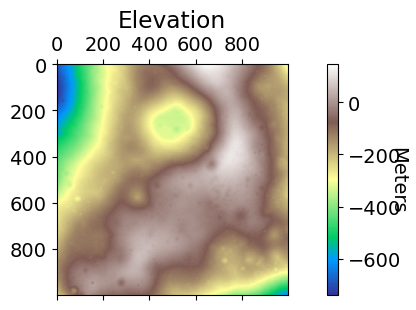

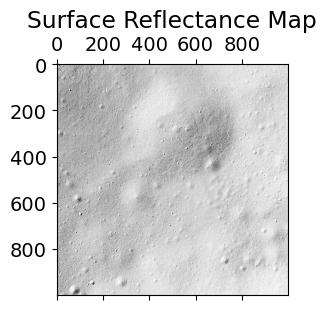

In [4]:
input_landmark = "output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk"
L = landmark.Landmark(input_landmark)

fig, ax = plt.subplots()
cax = ax.matshow(L.ele, cmap='terrain')
ax.set_title("Elevation")
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Meters', rotation=270)

fig, ax = plt.subplots()
cax = ax.matshow(L.srm, cmap='gray')
ax.set_title("Surface Reflectance Map")

## Self-compare

Landmark compared to itself should have near zero deltas

In [5]:
!$BUILD_DIR/landmark_comparison \
  -l2 $input_landmark \
  -l1 $input_landmark \
  -o output/self_test1_compare

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2213
i = 0 j = 0
best feat for homography 2213
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 2397
i = 0 j = 400
best feat for homography 2397
num_matched_features 2397
i = 0 j = 600
best feat for homography 2397
num_matched_features 2209
i = 0 j = 800
best feat for homography 2209
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_features 2601
i = 200 j = 400
best feat for homography 2601
num_matched_features 2601
i = 200 j = 600
best feat for homography 2601
num_matched_features 2397


/Users/cmauceri/Workspace/LanderVisionSystem/github_landmark_tools/tests/../scripts/python/landmark_tools/visualize_corr.py:133: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


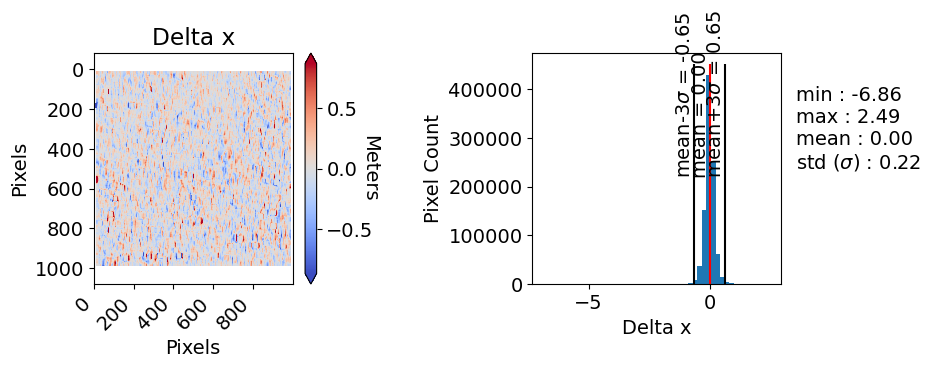

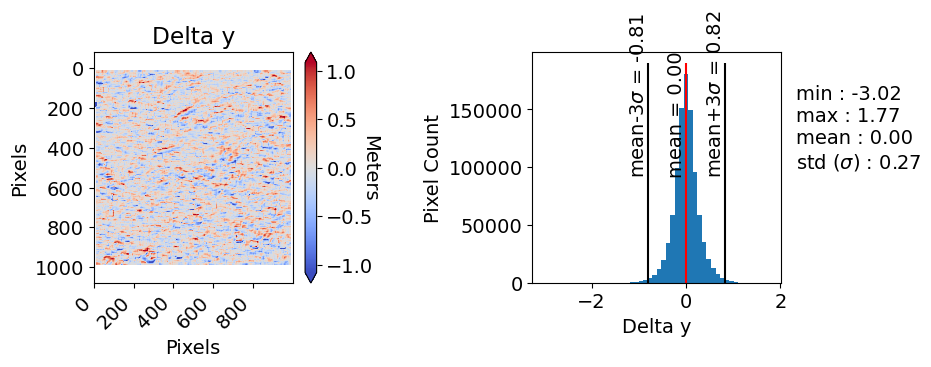

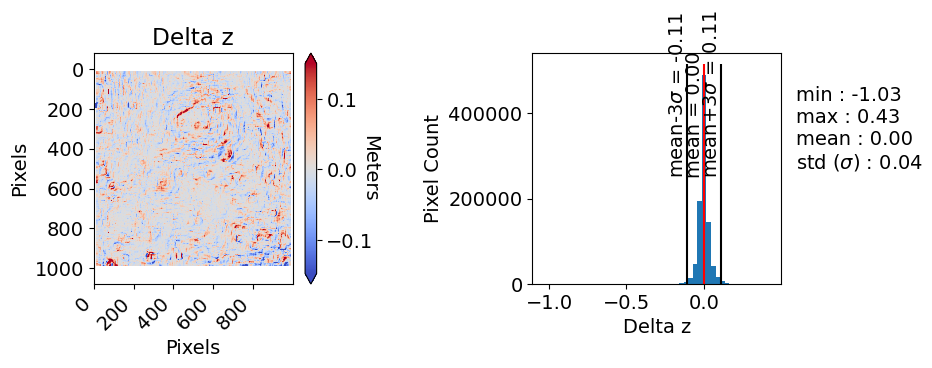

In [6]:
visualize_corr.displayAll("output/self_test1_compare", 1000, 1000, "self_test1_compare")

/Users/cmauceri/miniconda3/envs/blender/lib/python3.11/site-packages/skimage/measure/block.py:94: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)), **func_kwargs)


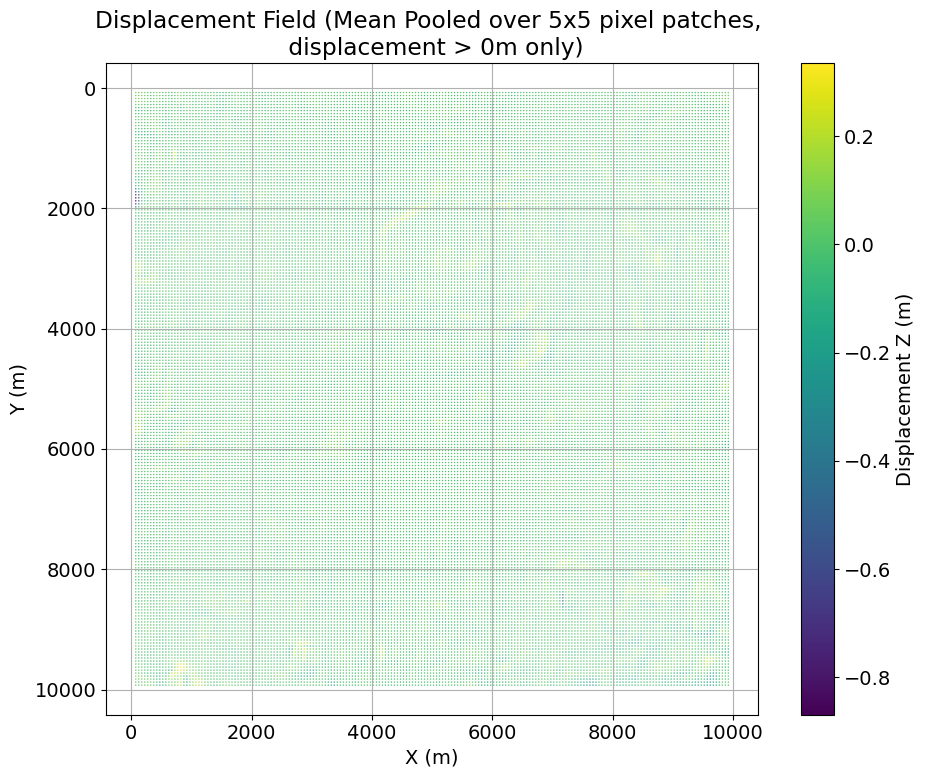

In [7]:
displacement_maps = visualize_corr.loadAllDisplacementMatrices("output/self_test1_compare", 1000, 1000)
fig = quiver_plot.quiver_plot(displacement_maps['dx'], displacement_maps['dy'], displacement_maps['dz'], 
            10, 0, (5, 5), 1)

## Random Displacement in Z

In [8]:
!$BUILD_DIR/distort_landmark

Simulate map error
Usage for distort_landmark:
------------------
  Required arguments:
    -input   <filename> - input landmark filepath
    -output  <filename> - output landmark filepath
  Optional arguments:
    -translate <x meters> <y meters> <z meters> - simulates map tie error 
    -rotate <in-plane rotation degrees> - simulates map orientation error
    -random_displace <mean> <stddev> - simulates correlation noise with gaussian elevation displacement


In [9]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/random_test1.lmk \
  -random_displace 0 5

!$BUILD_DIR/landmark_comparison \
  -l2 output/random_test1.lmk \
  -l1 $input_landmark \
  -o output/random_test1_compare

                 #! LVS Map v3.0
Applying random displacement to landmark with mu=0.000000, sigma=5.000000 ...done.
Landmark file written to: output/random_test1.lmk
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2213
i = 0 j = 0
best feat for homography 2213
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 2397
i = 0 j = 400
best feat for homography 2397
num_matched_features 2397
i = 0 j = 600
best feat for homography 2397
num_matched_features 2209
i = 0 j = 800
best feat for homography 2209
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_

/Users/cmauceri/Workspace/LanderVisionSystem/github_landmark_tools/tests/../scripts/python/landmark_tools/visualize_corr.py:133: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


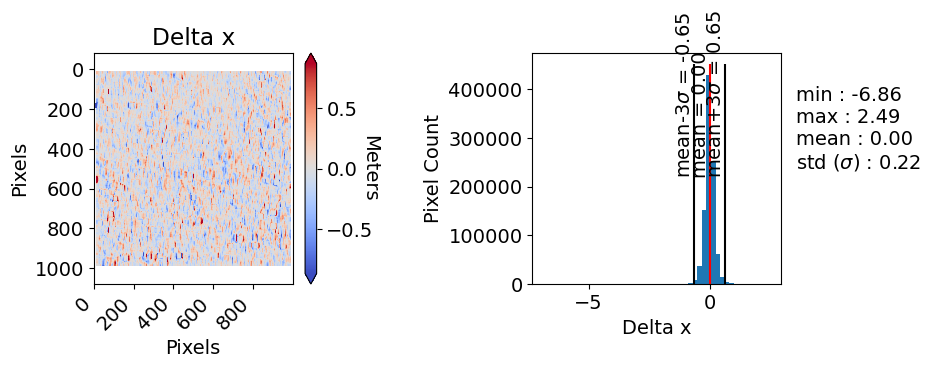

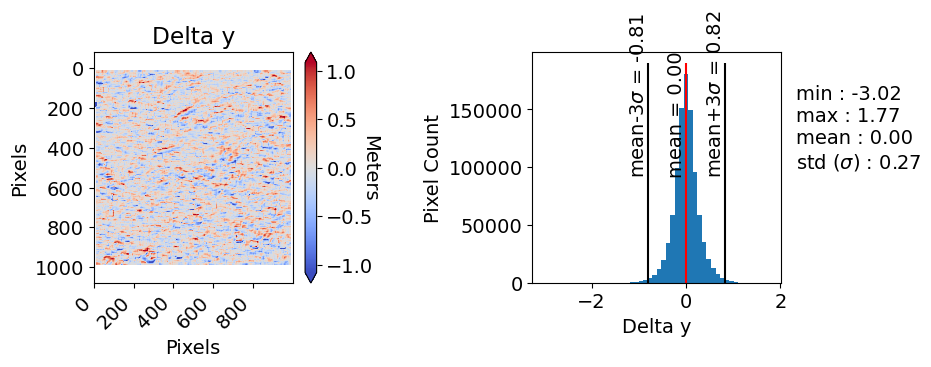

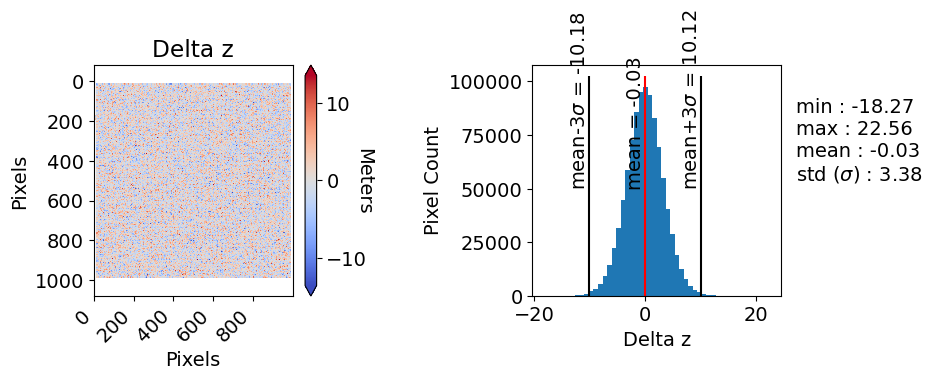

In [10]:
visualize_corr.displayAll("output/random_test1_compare", 1000, 1000, "random_test1_compare")

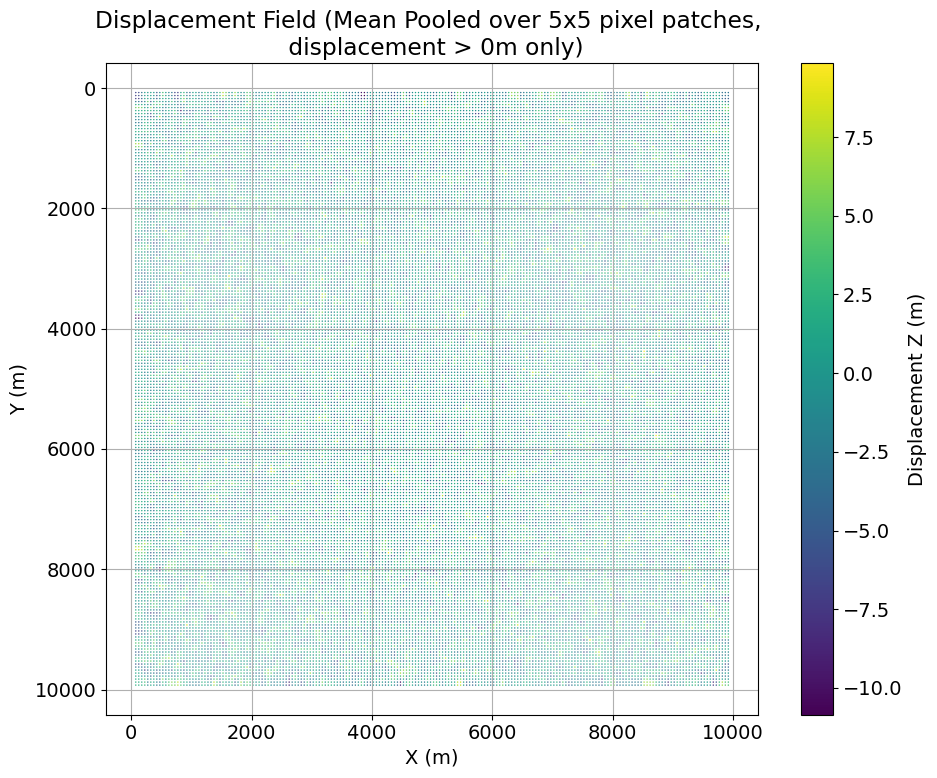

In [11]:
displacement_maps = visualize_corr.loadAllDisplacementMatrices("output/random_test1_compare", 1000, 1000)
fig = quiver_plot.quiver_plot(displacement_maps['dx'], displacement_maps['dy'], displacement_maps['dz'], 
            10, 0, (5, 5), 1)

## Rotation (Map Orientation Error)

In [12]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/rotate_test1.lmk \
  -rotate 1

!$BUILD_DIR/landmark_comparison \
  -l2 output/rotate_test1.lmk \
  -l1 $input_landmark \
  -o output/rotate_test1_compare

                 #! LVS Map v3.0
Rotating landmark in plane by 1.000000 degrees...done.
Landmark file written to: output/rotate_test1.lmk
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 19
num_matched_features 374
i = 0 j = 200
best feat for homography 369
num_matched_features 597
i = 0 j = 400
best feat for homography 584
num_matched_features 625
i = 0 j = 600
best feat for homography 607
num_matched_features 154
i = 0 j = 800
best feat for homography 150
line = 200
num_matched_features 20
num_matched_features 1708
i = 200 j = 200
best feat for homography 1708
num_matched_features 2601
i = 200 j = 400
best feat for homography 2601
num_matched_features 2600
i = 200 j = 600
best feat for ho

In [3]:
gt = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk")
L1 = landmark.Landmark("output/rotate_test1.lmk")
L1.assess_equality(gt)

self.mapRworld != other.mapRworld


/Users/cmauceri/Workspace/LanderVisionSystem/github_landmark_tools/tests/../scripts/python/landmark_tools/visualize_corr.py:133: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


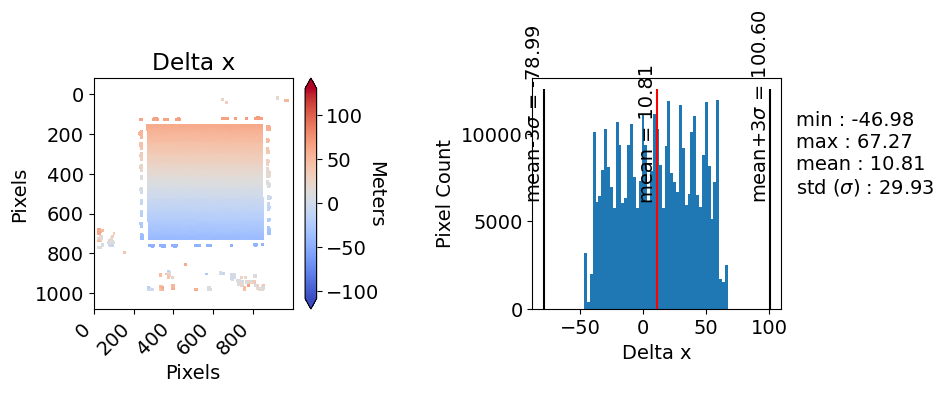

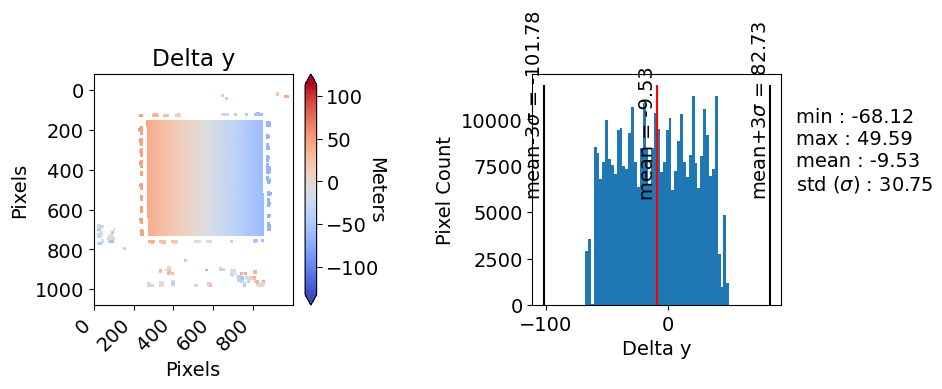

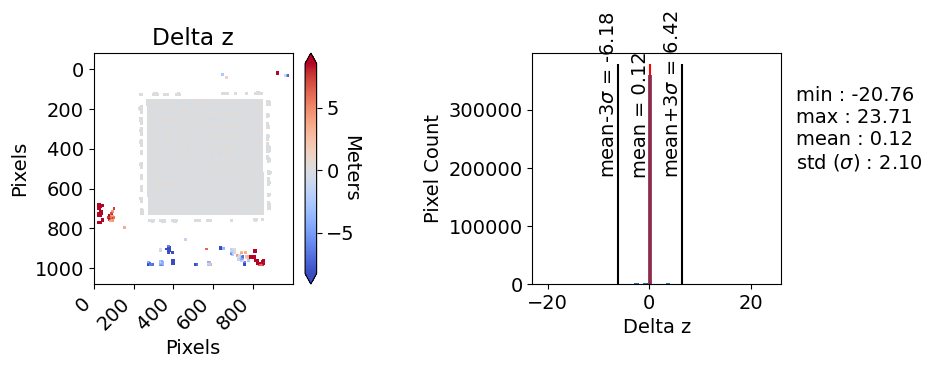

In [4]:
visualize_corr.displayAll("output/rotate_test1_compare", 1000, 1000, "rotate_test1_compare")

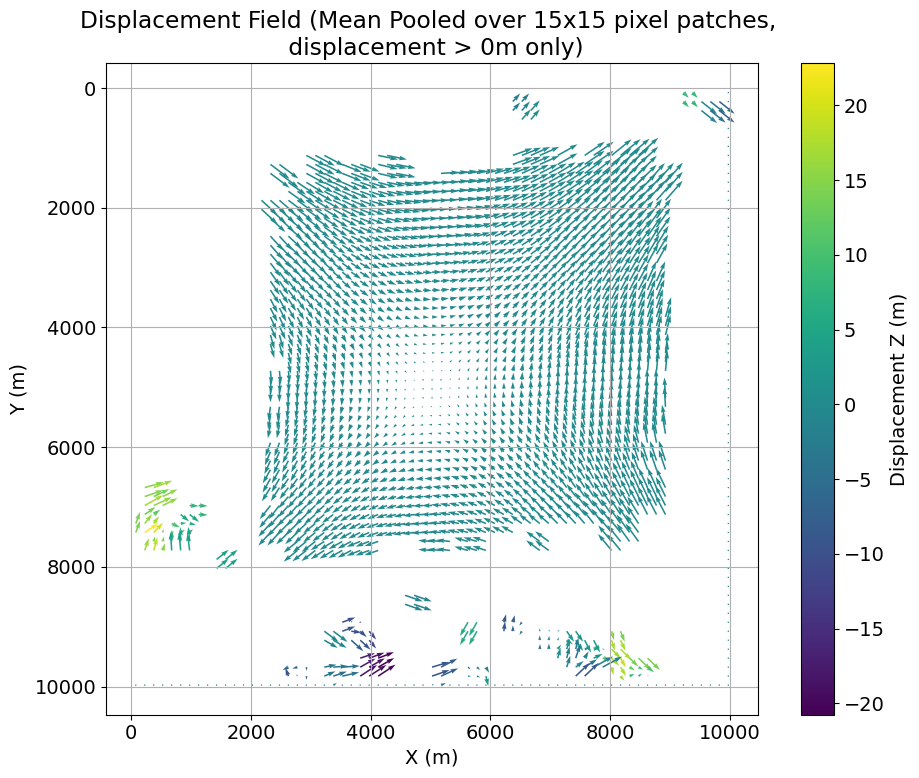

In [10]:
displacement_maps = visualize_corr.loadAllDisplacementMatrices("output/rotate_test1_compare", 1000, 1000)
fig = quiver_plot.quiver_plot(displacement_maps['dx'], displacement_maps['dy'], displacement_maps['dz'], 
            10, 0, (15, 15), .2)

## Translation (Map Tie Error)

In [32]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/translate_test1.lmk \
  -translate 50 0 50

!$BUILD_DIR/landmark_comparison \
  -l2 output/translate_test1.lmk \
  -l1 $input_landmark \
  -o output/translate_test1_compare

                 #! LVS Map v3.0
Translating landmark by (50.000000, 0.000000, 50.000000)...done.
Landmark file written to: output/translate_test1.lmk
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2216
i = 0 j = 0
best feat for homography 2213
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 2397
i = 0 j = 400
best feat for homography 2397
num_matched_features 2397
i = 0 j = 600
best feat for homography 2397
num_matched_features 2162
i = 0 j = 800
best feat for homography 2162
line = 200
num_matched_features 2404
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_feature

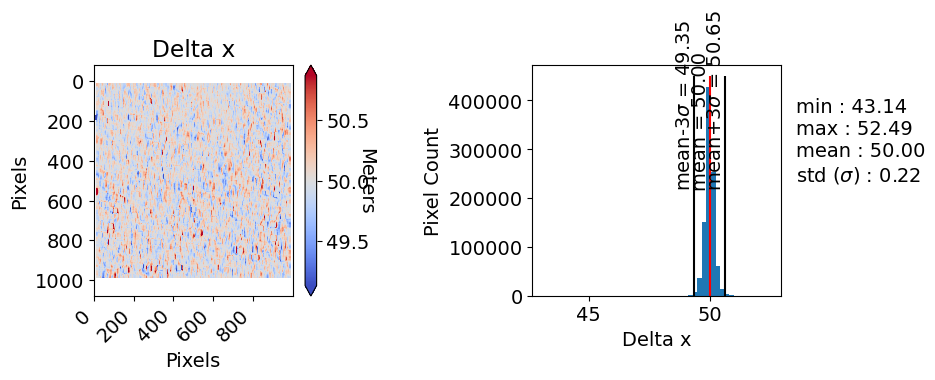

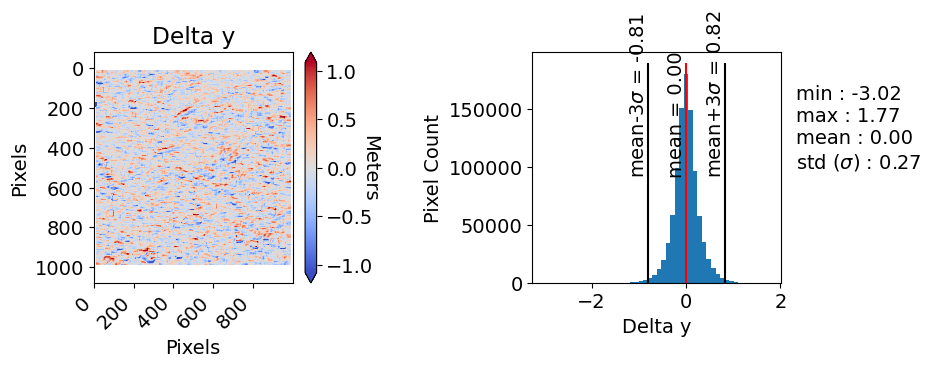

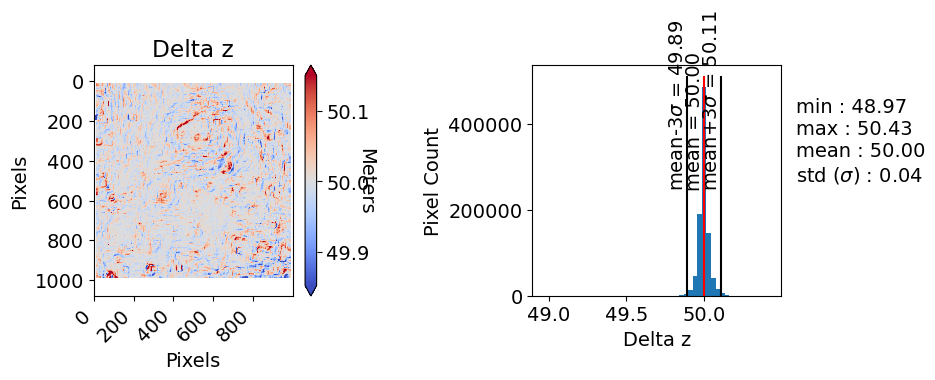

In [33]:
visualize_corr.displayAll("output/translate_test1_compare", 1000, 1000, "translate_test1_compare")

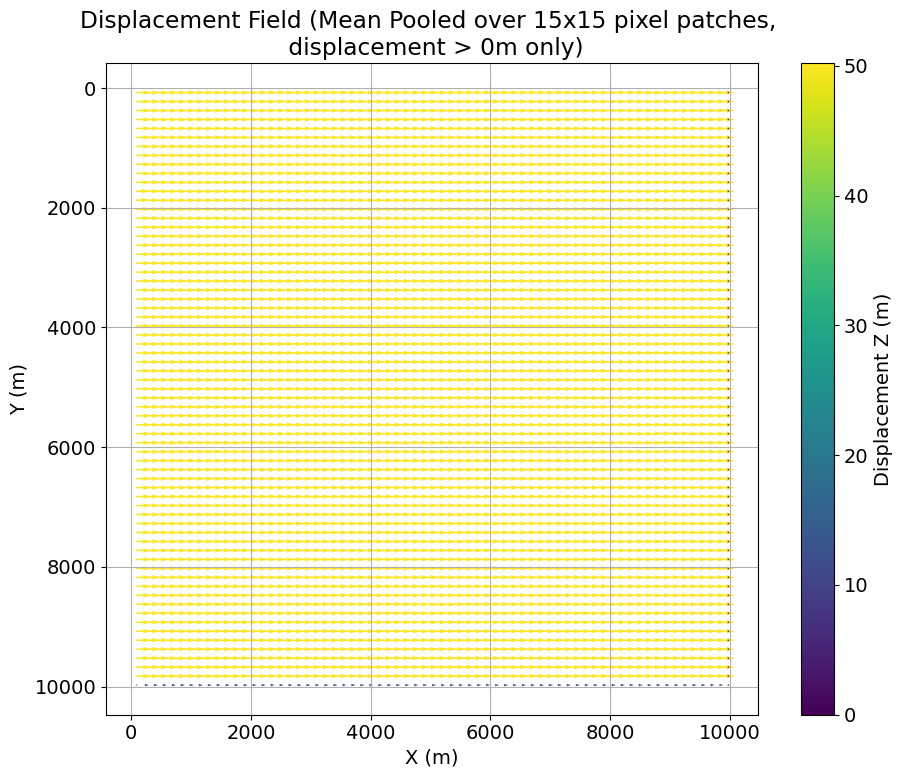

In [11]:
displacement_maps = visualize_corr.loadAllDisplacementMatrices("output/translate_test1_compare", 1000, 1000)
fig = quiver_plot.quiver_plot(displacement_maps['dx'], displacement_maps['dy'], displacement_maps['dz'], 
            10, 0, (15, 15), .2)

## Image jitter

In [17]:
# Add Image jitter to displacement map

X = np.zeros((1000, 1000))

for row in range(0, 50):
    for col in range(0, 1000):
        theta = np.sin(2*np.pi*row/50)
        X[row+250, col] = 5*theta

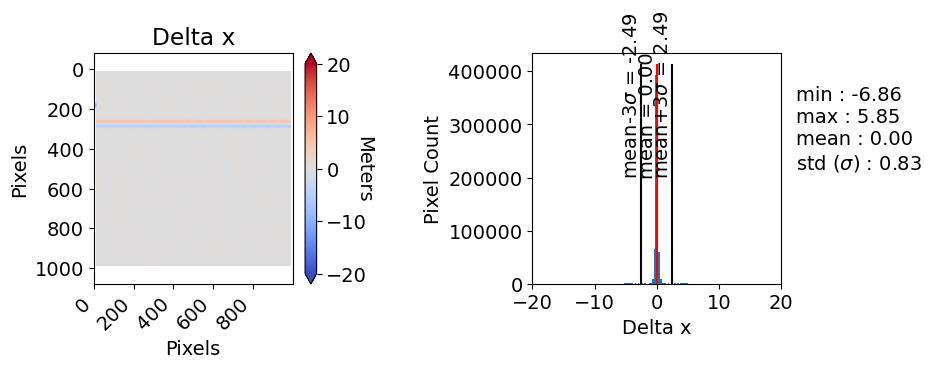

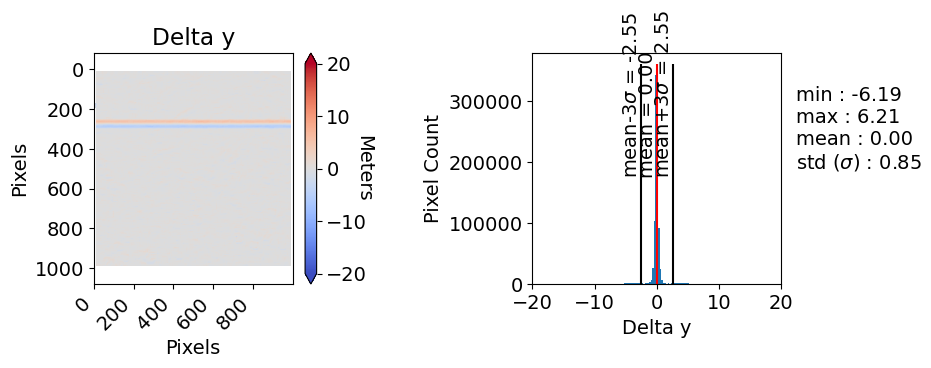

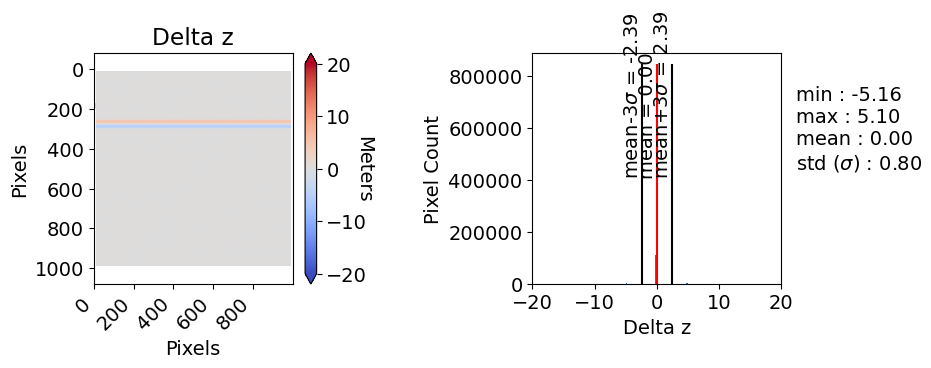

In [18]:
for c in ['x', 'y', 'z']:
    fig = plt.figure()
    filepath = "output/self_test1_compare_delta_{}_1000by1000.raw".format(c)
    width = 1000
    height = 1000
    
    I = visualize_corr.readBinaryImage(filepath, width, height)
    mask = np.isnan(I)

    ax = plt.subplot(1,9,(1,3))
    visualize_corr.visualize_corr(I+X, "image_jitter_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax=ax, limits=[-20,20])

    ax1= plt.subplot(1,9,(6,8))
    ax2= plt.subplot(1,9,9)
    visualize_corr.corr_histogram(I+X, "image_jitter_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax1=ax1, ax2=ax2, limits=[-20,20])

In [19]:
# Add distortion to srm image

!python $PYTHON_SCRIPT_DIR/simulate_pushbroom_jitter.py output/Haworth_final_adj_5mpp_surf_tif.png output/Haworth_final_adj_5mpp_surf_tif_pushboom.png --angle 50

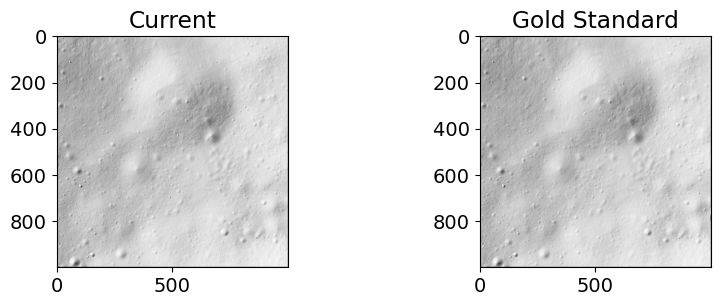

<Figure size 1000x300 with 0 Axes>

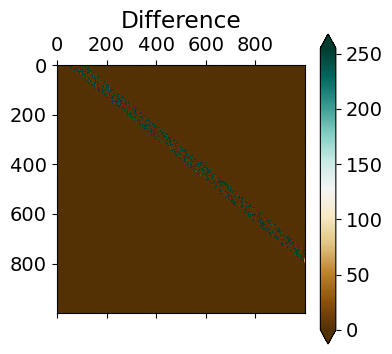

In [20]:
I1 = Image.open("output/Haworth_final_adj_5mpp_surf_tif.png")
I_org = Image.open("output/Haworth_final_adj_5mpp_surf_tif_pushboom.png")

plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(I_org, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(np.asarray(I1)-np.asarray(I_org), cmap='BrBG')
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [21]:
!$BUILD_DIR/image_comparison -base_image output/Haworth_final_adj_5mpp_surf_tif.png -child_image output/Haworth_final_adj_5mpp_surf_tif_pushboom.png -output_dir output -output_filename_prefix image_correlation

zsh:1: no such file or directory: ../build//image_comparison


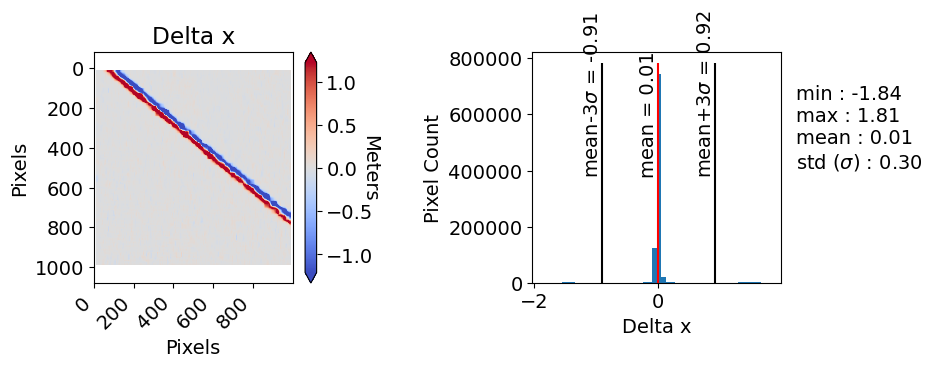

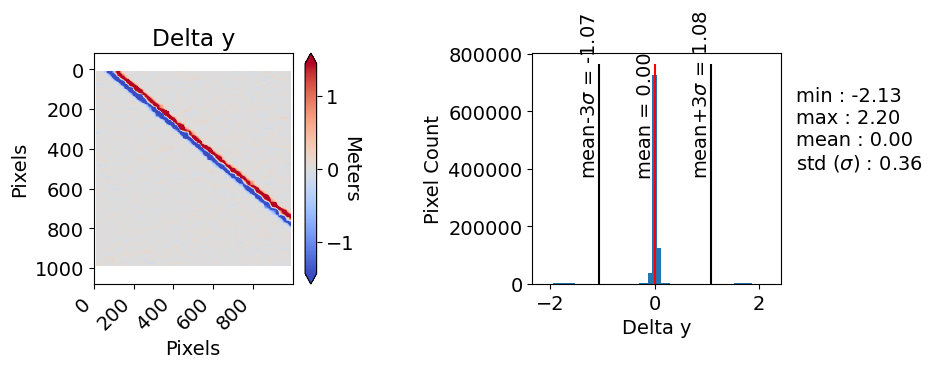

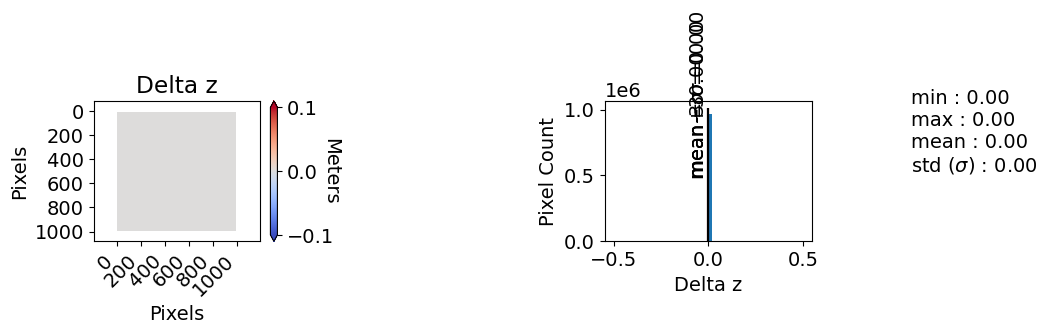

In [22]:
width = 1000
height = 1000
visualize_corr.displayAll("output/image_correlation", width, height, "output/image_correlation")